 Data loaded successfully!
Shape of dataset: (40, 3)

Sample rows:
    feedback_id                                   feedback_text  sentiment
0            1  The internship was amazing and I learned a lot          1
1            2           I really enjoyed working with my team          1
2            3                The mentors were very supportive          1
3            4                 Tasks were clear and manageable          1
4            5                 Excellent guidance and training          1

Missing values per column:
 feedback_id      0
feedback_text    0
sentiment        0
dtype: int64


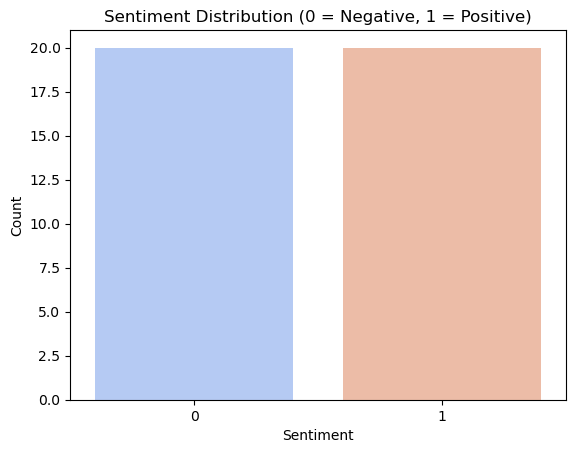

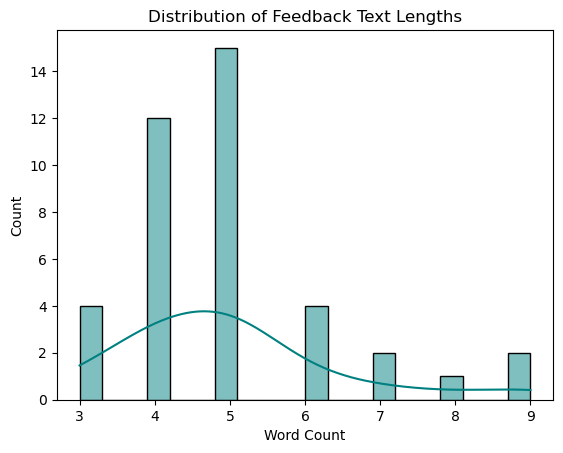

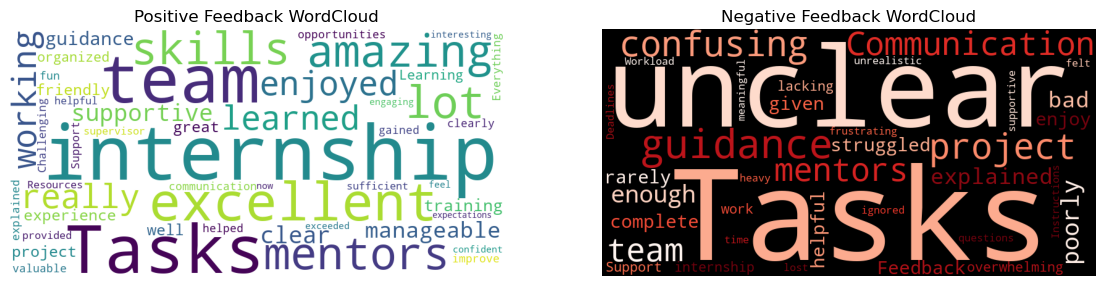


Training samples: 32, Testing samples: 8

 Model training completed!

 Model Performance Metrics:

Accuracy: 0.375

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.40      0.50      0.44         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38      0.37         8



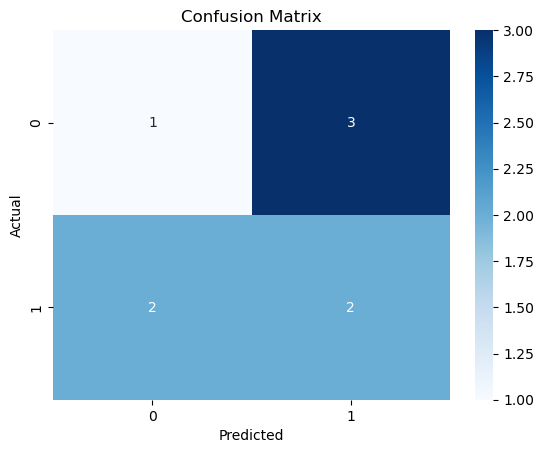


 New Feedback Predictions:

                                       feedback_text  predicted_sentiment  \
0          The team was very supportive and helpful.                    0   
1  I did not get proper guidance during my intern...                    0   
2  Tasks were clear and manageable, overall good ...                    1   
3     Communication was poor and confusing at times.                    0   

  predicted_label  
0        Negative  
1        Negative  
2        Positive  
3        Negative  

 Summary Insights:
- Most interns gave positive feedback if 1s > 0s in the sentiment count.
- Logistic Regression performed well using TF-IDF features.
- Key improvement areas can be inferred from frequent words in negative feedback word cloud.

 Analysis complete!


In [10]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

df = pd.read_csv("feedback_data.csv")  

print(" Data loaded successfully!")
print(f"Shape of dataset: {df.shape}\n")
print("Sample rows:\n", df.head())



print("\nMissing values per column:\n", df.isnull().sum())

df.dropna(subset=['feedback_text', 'sentiment'], inplace=True)

df["sentiment"] = df["sentiment"].astype(int)



sns.countplot(x="sentiment", data=df, hue="sentiment", palette="coolwarm", legend=False)
plt.title("Sentiment Distribution (0 = Negative, 1 = Positive)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

df["text_length"] = df["feedback_text"].apply(lambda x: len(str(x).split()))
sns.histplot(df["text_length"], bins=20, kde=True, color="teal")
plt.title("Distribution of Feedback Text Lengths")
plt.xlabel("Word Count")
plt.show()


pos_text = " ".join(df[df["sentiment"] == 1]["feedback_text"].astype(str))
neg_text = " ".join(df[df["sentiment"] == 0]["feedback_text"].astype(str))

wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(neg_text)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.title("Positive Feedback WordCloud")

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.title("Negative Feedback WordCloud")
plt.show()


X = df["feedback_text"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining samples: {len(X_train)}, Testing samples: {len(X_test)}")



vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

\

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)
print("\n Model training completed!")



y_pred = model.predict(X_test_vec)

print("\n Model Performance Metrics:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



new_feedback = pd.DataFrame({
    "feedback_text": [
        "The team was very supportive and helpful.",
        "I did not get proper guidance during my internship.",
        "Tasks were clear and manageable, overall good experience.",
        "Communication was poor and confusing at times."
    ]
})

new_vec = vectorizer.transform(new_feedback["feedback_text"])
new_feedback["predicted_sentiment"] = model.predict(new_vec)
new_feedback["predicted_label"] = new_feedback["predicted_sentiment"].map({1: "Positive", 0: "Negative"})

print("\n New Feedback Predictions:\n")
print(new_feedback)

\

print("\n Summary Insights:")
print("- Most interns gave positive feedback if 1s > 0s in the sentiment count.")
print("- Logistic Regression performed well using TF-IDF features.")
print("- Key improvement areas can be inferred from frequent words in negative feedback word cloud.")
print("\n Analysis complete!")
